<a href="https://colab.research.google.com/github/FlexTaco/cs370/blob/main/assignments/assignment-1/Copy_of_011_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Development Environment Setup


In [ ]:
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available():
    print(torch.cuda.current_device())
    print(torch.cuda.device_count())
    print(torch.cuda.get_device_name(0))

device

device(type='cpu')

## Simulation of Multivariate Normal Distribution


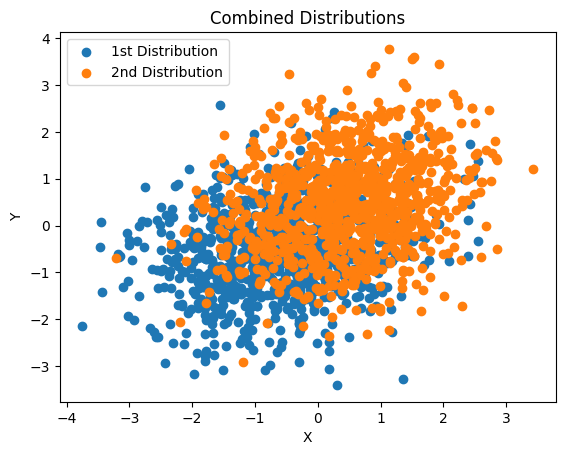

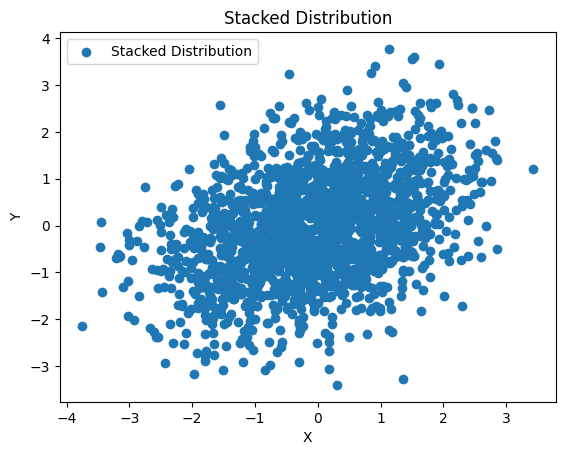

In [ ]:
import torch
import matplotlib.pyplot as plt

µ = torch.tensor([-0.5, -0.5])
cov = torch.tensor([[1, 0.25], [0.25, 1]])

µ2 = torch.tensor([0.5, 0.5])
cov2 = torch.tensor([[1, 0.25], [0.25, 1]])

firstSample = torch.distributions.MultivariateNormal(µ, cov).sample((1000,))
secondSample = torch.distributions.MultivariateNormal(µ2, cov2).sample((1000,))

plt.scatter(firstSample[:, 0], firstSample[:, 1], label='1st Distribution')
plt.scatter(secondSample[:, 0], secondSample[:, 1], label='2nd Distribution')
plt.title('Combined Distributions')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

stacked_samples = torch.cat((firstSample, secondSample))

plt.scatter(stacked_samples[:, 0], stacked_samples[:, 1], label='Stacked Distribution')
plt.title('Stacked Distribution')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

## K-Means Clustering


In [26]:
import torch
import matplotlib.pyplot as plt
from torch.optim import Adam

# from previous assignment
µ = torch.tensor([-0.5, -0.5])
cov = torch.tensor([[1, 0.25], [0.25, 1]])

µ2 = torch.tensor([0.5, 0.5])
cov2 = torch.tensor([[1, 0.25], [0.25, 1]])

firstSample = torch.distributions.MultivariateNormal(µ, cov).sample((1000,))
secondSample = torch.distributions.MultivariateNormal(µ2, cov2).sample((1000,))

stacked_samples = torch.cat((firstSample, secondSample))

# number of k
k = 3

# random cluster centers
def random_center():
  random = stacked_samples[torch.randint(0, stacked_samples.shape[0], (k,))]
  return random

# can do this without function
def kmeans(X, centers, n_iter=100):
  iteration = 1
  new_centers = torch.zeros(3, 2)
  while iteration < n_iter and not torch.equal(centers, new_centers):
      # Calculate distances between each point and cluster centers
      distances = torch.cdist(X, centers)
      # Assign each point to the nearest center
      labels = torch.argmin(distances, dim=1)

      # Update centers as the mean of assigned points
      new_centers = torch.stack([X[labels == i].mean(dim=0) for i in range(k)])

      # Check for convergence (if centers stop changing)
      if torch.allclose(centers, new_centers, atol=1e-4):
          break

      centers = new_centers
      iteration+=1
  return labels, centers

# plot function
def plot(iteration):
  clear_output(wait=True)
  plt.scatter(stacked_samples[:, 0], stacked_samples[:, 1], c=labels, cmap='viridis', marker='o')
  plt.scatter(final_centers[:, 0], final_centers[:, 1], c='red', marker='x', s=200, label='Centers')
  plt.title(f'Iteration {iteration}')
  plt.legend()
  plt.show()


centers = random_center()

# Run K-means clustering
labels, final_centers = kmeans(stacked_samples, centers)

# for i in range(10):
#   plot(i)


## Projection with Principal Components Analysis (PCA)

Principal component 0
tensor([-0.1989,  0.1478, -0.8927, -0.3763])

Principal component 1
tensor([ 0.4892,  0.7956, -0.1192,  0.3368])

Principal component 2
tensor([-0.1618, -0.3188, -0.3769,  0.8545])

Principal component 3
tensor([ 0.8336, -0.4935, -0.2162, -0.1216])

Principal components from torch.pca_lowrank:
tensor([[ 0.1989, -0.4892, -0.1619,  0.8336],
        [-0.1478, -0.7956, -0.3187, -0.4935],
        [ 0.8927,  0.1192, -0.3769, -0.2163],
        [ 0.3763, -0.3368,  0.8545, -0.1216]])
Principal components from calculation:
tensor([[ 0.1989, -0.4892, -0.1618,  0.8336],
        [-0.1478, -0.7956, -0.3188, -0.4935],
        [ 0.8927,  0.1192, -0.3769, -0.2162],
        [ 0.3763, -0.3368,  0.8545, -0.1216]])


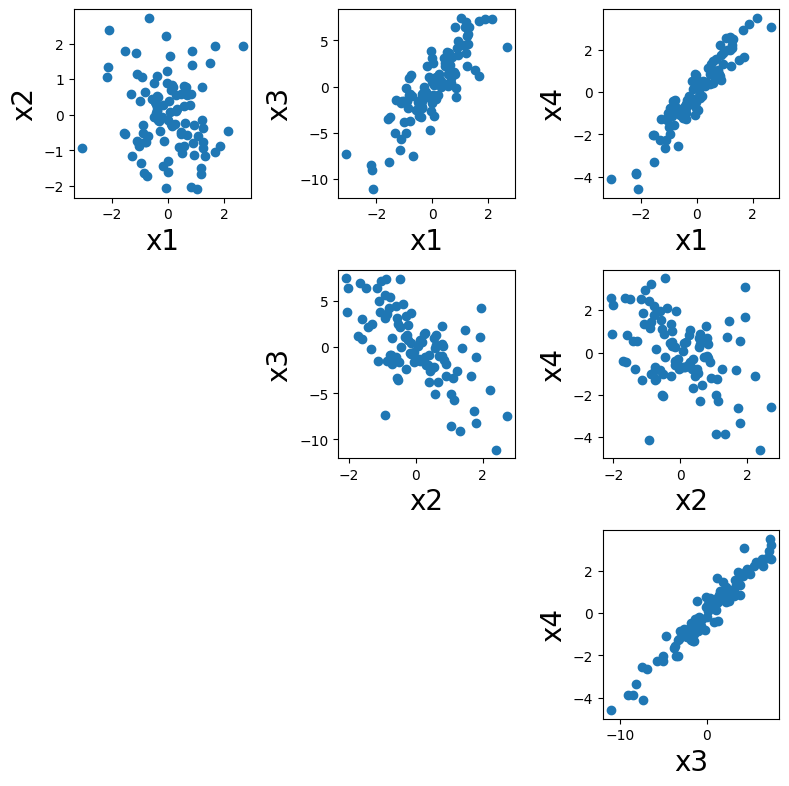

In [24]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

#generate some data
X = torch.randn(100, 4)
X[:, 2] = 3 * X[:, 0] - 2 * X[:, 1] + torch.normal(0, 0.1, (100,))
X[:, 3] = 1.5 * X[:, 0] - 0.5 * X[:, 1] + torch.normal(0, 0.1, (100,))

#each feature will have zero mean
X = X - X.mean(dim=0)
plt.figure(figsize=(10, 10))
for i in range(4):
    for j in range(4):
        if j > i:
            plt.subplot(4, 4, i*4+j+1)
            plt.scatter(X[:, i].numpy(), X[:, j].numpy())
            plt.xlabel(f'x{i+1}', fontsize=20)
            plt.ylabel(f'x{j+1}', fontsize=20)
plt.tight_layout()

#compute covariance matrix
cov_matrix = torch.mm(X.t(), X) / (X.shape[0] - 1)

#compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = torch.linalg.eigh(cov_matrix)

#sort eigenvectors by eigenvalues
sorted_indices = torch.argsort(eigenvalues, descending=True)
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

#print each principal component
for i, component in enumerate(eigenvectors.t()):
    print(f'Principal component {i}')
    print(component)
    print()
#compare with torch.pca_lowrank
U, S, V = torch.pca_lowrank(X)

#have to flip the sign
for i in range(eigenvectors.shape[1]):
    if torch.dot(eigenvectors[:, i], V[:, i]) < 0:
        eigenvectors[:, i] *= -1


print("Principal components from torch.pca_lowrank:")
print(V)

#have to transpose it, else the numbers are backwards
X_pca = eigenvectors.t()
calculated = torch.transpose(X_pca,0,1)
print("Principal components from calculation:")
print(calculated)


In [8]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from IPython.display import clear_output

# Generate data (bivariate Gaussians)
µ1 = torch.tensor([-0.5, -0.5])
cov1 = torch.tensor([[1, 0.25], [0.25, 1]])
µ2 = torch.tensor([0.5, 0.5])
cov2 = torch.tensor([[1, 0.25], [0.25, 1]])

first_sample = torch.distributions.MultivariateNormal(µ1, cov1).sample((1000,))
second_sample = torch.distributions.MultivariateNormal(µ2, cov2).sample((1000,))
stacked_samples = torch.cat((first_sample, second_sample))

# Convert to numpy for sklearn PCA and visualization purposes
data = stacked_samples.numpy()

# Function to generate random centroids
def random_centroids(data, k):
    indices = np.random.choice(data.shape[0], k, replace=False)
    return data[indices]

# Function to calculate new centroids
def new_centroids(data, labels, k):
    centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
    return centroids

# Function to get labels (closest centroids)
def get_labels(data, centroids):
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

# Plotting function using PCA for visualization
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids)

    clear_output(wait=True)  # Clear the previous plot output
    plt.title(f'Iteration {iteration}')
    plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='viridis', s=50)
    plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], c='red', marker='x', s=200, label='Centroids')
    plt.legend()
    plt.show()

# Parameters
max_iterations = 100
centroid_count = 3

# Initialize centroids
centroids = random_centroids(data, centroid_count)
old_centroids = np.zeros_like(centroids)
iteration = 1
centroids
# K-means loop
# while iteration < max_iterations and not centroids(old_centroids):
#     old_centroids = centroids
#     labels = get_labels(data, centroids)
#     centroids = new_centroids(data, labels, centroid_count)
#     plot_clusters(data, labels, centroids, iteration)
#     iteration += 1


array([[ 1.2981335 , -0.00878096],
       [ 1.029769  , -0.04223871],
       [ 0.14532033,  1.918654  ]], dtype=float32)